Text(0.5, 0, 'Time (s)')

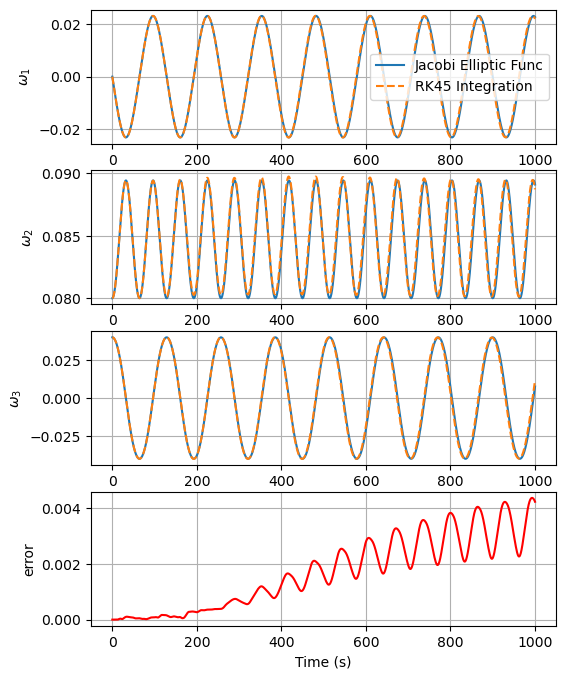

In [86]:
import gtsam
import numpy as np
import scipy
import matplotlib.pyplot as plt


I_1 = 0.03
I_2 = 0.01
I_3 = 0.02

def newtonEuler(t, omega):
  w_1 = omega[0]
  w_2 = omega[1]
  w_3 = omega[2]

  omega_dot = np.array([0.0,0.0,0.0])
  omega_dot[0] = - (I_3 - I_2)/I_1*w_2*w_3
  omega_dot[1] = - (I_1 - I_3)/I_2*w_3*w_1
  omega_dot[2] =   (I_1 - I_2)/I_3*w_1*w_2
  
  return omega_dot




w_1_0 = 0.0
w_2_0 = 0.08
w_3_0 = 0.04

k = w_3_0*np.sqrt( I_3*(I_1 - I_3) / (I_2*(I_1 - I_2)*w_2_0*w_2_0 + I_3*(I_1 - I_3)*w_3_0*w_3_0) )
A = w_3_0*np.sqrt( I_3*(I_3 - I_2) / (I_1*(I_1 - I_2)) )
b = np.sqrt(  (I_3 - I_2) * ( I_2*(I_1 - I_2)*w_2_0*w_2_0 + I_3*(I_1 - I_3)*w_3_0*w_3_0 ) / (I_1*I_2*I_3) )
#b = (I_1-I_2)/I_3*A*w_2_0/ (w_3_0*np.sqrt(1-k*k))

B = w_2_0/np.sqrt(1.0 - k*k)
C = w_3_0

K = scipy.special.ellipk(k*k)

nb_pnts = 100000
t_span = 1000.0
t_vec = np.linspace(0,t_span, nb_pnts)

omega = np.zeros((3,nb_pnts))
for i in range(len(t_vec)):
  u = b*t_vec[i] + K
  sn, cn, dn, _ = scipy.special.ellipj(u,k*k)
  #dn = np.sqrt(1 - k*k*sn*sn)
  omega[0,i] = A*cn
  omega[1,i] = B*dn
  omega[2,i] = C*sn


w_0 = np.array([w_1_0,w_2_0,w_3_0])

sol = scipy.integrate.solve_ivp(newtonEuler, [0,t_span], w_0, t_eval=t_vec)

omega_check = sol.y

errors = np.linalg.norm(omega - omega_check, axis=0)

  

fig, ((ax1, ax2, ax3, ax4)) = plt.subplots(nrows=4, ncols=1, figsize=(6, 8))

ax1.plot(t_vec,omega[0,:])
ax1.plot(t_vec,omega_check[0,:], linestyle='--')



ax1.set_ylabel(r'$\omega_1$')
ax1.grid(True)
ax1.legend(["Jacobi Elliptic Func","RK45 Integration"])

ax2.plot(t_vec,omega[1,:])
ax2.plot(t_vec,omega_check[1,:], linestyle='--')

ax2.set_ylabel(r'$\omega_2$')
ax2.grid(True)

ax3.plot(t_vec,omega[2,:])
ax3.plot(t_vec,omega_check[2,:], linestyle='--')

ax3.set_ylabel(r'$\omega_3$')
ax3.grid(True)


ax4.plot(t_vec,errors, color='r')
ax4.set_ylabel(r'error')
ax4.grid(True)
ax4.set_xlabel("Time (s)")